# Sesión 5 - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, problemas conocidos que vamos a resolver utilizando algoritmos de búsqueda local. 
En la segunda parte de la práctica se pide resolver el problema dado en el enunciado.

In [ ]:
## Parte 1. Algoritmo de escalada
"""Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py
"""
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                 key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [ ]:
cd aima

In [ ]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        ## Puedes buscar información adicional del método 2-opt. 
        ## Un vecino 2-opt consiste en eliminar dos aristas y volver a conectar los dos caminos resultantes de 
        ## forma diferente para obtener un nuevo recorrido. 
                
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [ ]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

Esta es la imagen del mapa de Rumanía. 

![image.png](attachment:image.png)

In [ ]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.

romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos están a distancias 75, 140, 118 de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [ ]:
romania_locations = romania_map.locations
print(romania_locations)

In [ ]:
# node colors, node positions and node label positions
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

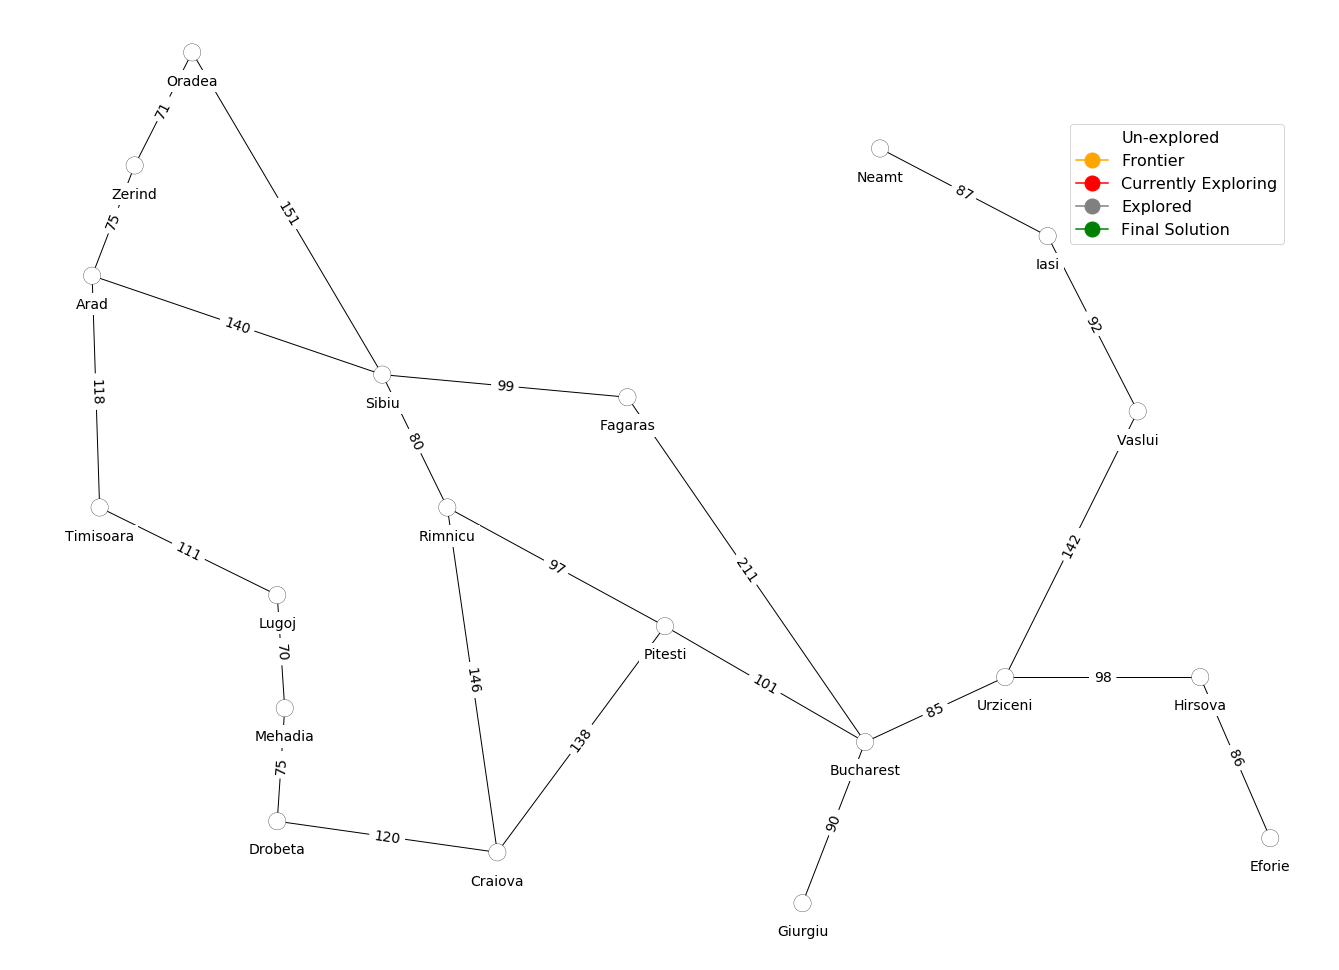

In [ ]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

In [ ]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se ha extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

In [ ]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP
##  Escalada por máxima pendiente con 100 vecinos generados con el procedimiento 2-opt


def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state

In [ ]:
# Y lo resolvemos con escalada por máxima pendiente. 
hill_climbing(tsp)

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza varias ejecuciones y comenta razonadamente las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución.  ¿Ha encontrado el algoritmo el óptimo global? ¿Ha encontrado la misma solución en distintas ejecuciones?
Sólo se pide hacer una comparativa teórica (breve) con cómo se comporta este algoritmo.
Relacionarlo con otros algoritmos vistos en clase.

En distintas ejecuciones se encuentran diferentes soluciones. No encuentra el óptimo global porque se suele quedar en máximos
locales, a diferencia de otros algoritmos vistos en temas anteriores. Los de búsqueda, por ejemplo encuentran siempre el óptimo,
aunque tarden mucho más. Este algoritmo, sin embargo, tiene la ventaja de que avanza mucho más rápido hacia los máximos locales, 
que pueden ser una solución según los requerimientos del problema.

Estas diferencias se deben a la estructura del árbol de búsqueda de ambos algoritmos:
- En TSP cada nodo es una tupla de todas las ciudades donde los hijos/vecinos de un nodo son pequeñas variaciones del nodo original/padre. Esto nos da resultados rápidos porque en cada nodo tenemos una solución y en cada iteración nos quedamos con los mejores. Sin embargo si nos encontramos un máximo local, el nodo no va a generar vecinos mejores, por tanto se quedaría atascado.

- En los algoritmos de búsqueda vistos en temas anteriores cada nodo es una sola ciudad. Los hijos de cada nodo en este caso son el resto de ciudades que quedan por visitar. Se tiene en cuenta para buscar la solución óptima la distancia entre ciudades en cada paso/nivel del árbol (y una heurística opcionalmente). De esta manera el algoritmo es más lento porque explora muchas más soluciones pero da un resultado final óptimo.

In [ ]:
## Parte 2. Enfriamiento simulado ( simulated annealing) 
"""El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    """
def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

In [ ]:
"""Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 
"""
def exp_schedule(k=20, lam=0.005, limit=100):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el valor más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [ ]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [ ]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [ ]:
problem = PeakFindingProblem(initial, grid, directions4)

In [ ]:
# Lo resolvemos con enfriamiento simulado
import math
solutions = {problem.value(simulated_annealing(problem)) for i in range(100)}
max(solutions)

In [ ]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [ ]:
solution = problem.value(hill_climbing(problem))
solution

In [ ]:
### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 
 


grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]


In [ ]:
problem = PeakFindingProblem(initial, grid, directions4)
solutions = [problem.value(simulated_annealing(problem)) for i in range(100)]
solutions

In [ ]:
solution = [problem.value(hill_climbing(problem)) for i in range(100)]
solution

El algoritmo de escalada por máxima pendiente da como resultado siempre 0.0. Esto se debe a que, como hemos indicado anteriormente, ese algoritmo se para cuando enuentra un máximo local o una meseta. En la posición inicial (0,0) y sus adyacentes
encontramos que todas las casillas tienen el mismo valor (0.0), es decir, se trata de una meseta.

El algoritmo de enfriamiento simulado nos da resultados variados en cada ejecución. La mayoría de veces da 0.0 pero gracias al factor de enfriamiento (no elegir siempre los mejores vecinos), el cual nos permite "escapar" de máximos locales y mesetas, hay muchas ejecuciones en las que nos da un valor más cercano al máximo o incluso el máximo (11.2). 

## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [ ]:
import random

In [ ]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento del algoritmo genético. 

In [ ]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como un número natural:  
# La siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    x=x[::-1]
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [ ]:
binario_a_decimal((1,1,1,0))

In [ ]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [ ]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1125

In [ ]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1265625

In [ ]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [ ]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.9)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [ ]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Salida esperada

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [ ]:
def poblacion_inicial(problema_genetico, size):
    ##Si la longitud de los genes < la longitud de los cromosomas habrá que repetir elementos en el cromosoma
    if len(problema_genetico.genes)<problema_genetico.longitud_individuos:   
        l=[]
        for i in range (size):
            lista = []
            for j in range (problema_genetico.longitud_individuos):
                lista.append(random.choice(problema_genetico.genes))
            l.append(lista)
        return l
    ##Si no supondremos (por el problema del cuadrado) que no se pueden repetir.
    else:                   
        l=[]
        for i in range (size):
            lista=[]
            conj = set(problema_genetico.genes)
            for j in range (problema_genetico.longitud_individuos):
                elem=random.choice(list(conj))
                lista.append(elem)
                conj.remove(elem)
            l.append(lista)
        return l
    
"""Para el caso en el que el tamaño del cromosoma/individuo sea menor o igual que el del número de genes pero se permitan
repeticiones, habría que redifinir la función (no es el caso de ninguno de los tres problemas en los que trabajamos.)"""

In [ ]:
poblacion_inicial(cuadrados,10)

In [ ]:
### La función escoge dos cromosomas de la población y llama a la función fun_cruza
def cruza_padres(problema_genetico, poblacion):
    for i in range(len(poblacion)//2):
        padre1 = 2*i
        padre2 = 2*i+1
        l = problema_genetico.cruza(poblacion[padre1],poblacion[padre2])
        poblacion[padre1] = l[0]
        poblacion[padre2] = l[1]
    return poblacion



In [ ]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
def muta_individuos(problema_genetico, poblacion, prob):
    for ind in poblacion:
        problema_genetico.muta(ind,prob)
    return poblacion
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.

In [ ]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [ ]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [ ]:
muta_individuos(cuadrados,p1,0.2)

Vamos a definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [ ]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [ ]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


In [ ]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

In [ ]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [ ]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 4.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  
Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [ ]:
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)
# Salida esperada: (0, 0)

In [ ]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

Valoración: El algoritmo genético lo que hace es calcular la proporción de cromosomas que vamos a cruzar, y luego hace una selección por torneo de estos dando resultado a un conjunto que será el de padres. También se hace una selección por torneo de los que van a pasar directamente a las siguiente generación. Se unen estos últimos con los hijos de los anteriores y se muta este nuevo conjunto (con una cierta probabilidad para cada individuo). EL resultado del último paso será una nueva generación, por tanto este proceso es una iteracion del algoritmo que repetiremos el número de generaciones que queramos.

Como vemos, el algoritmo funciona correctamente tanto para minimización como para maximización porque en ambos casos nos da resultados cercanos a la salida esperada (la cual es la solución óptima). De hecho si lo ejecutamos más veces, en muchas ocasiones nos da la salida esperada.

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 5

Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.
Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [ ]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [ ]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 5)

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [ ]:
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    #...
    valor = 0
    cromosoma_decod = decodifica_mochila(cromosoma,n_objetos,pesos,capacidad)
    for i in range(n_objetos):
        if cromosoma_decod[i] == 1:
            valor+= valores[i]
    
    return valor

In [ ]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [ ]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [ ]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [ ]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

### Ejercicio 6

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [ ]:
# >>> algoritmo_genetico_t(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico_t(m2g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 1439)
# >>> algoritmo_genetico_t(m2g,3,max,200,100,0.8,0.05)
# ([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)

# >>> algoritmo_genetico_t(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico_t(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico_t(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico_t(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico_t(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico_t(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [ ]:

def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 14, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


In [ ]:
algoritmo_genetico(m3g,5,max,2000,100,0.9,0.1)

     Problema k  Generaciones Individuos/Gen Prop.Cruzar Prob.Mut  Resultados (k = nº ind seleccionados en torneos de selección)
    m1g      0  2            10             0.8         0.05      276/276
    m1g      3  2            10             0.8         0.05      276/277
    m1g      6  2            10             0.8         0.05      251/309
    m1g      9  2            10             0.8         0.05      309/309
    
    m1g      3  0            10             0.8         0.05      269/276
    m1g      3  3            10             0.8         0.05      269/277
    m1g      3  6            10             0.8         0.05      309/277
    m1g      3  15           10             0.8         0.05      309/309 (opt)
    
    m1g      3  2            8              0.8         0.05      269/277
    m1g      3  2            16             0.8         0.05      284/284
    m1g      3  2            24             0.8         0.05      309/309 (opt)
    m1g      3  2            38             0.8         0.05      309/309 (opt)
    
    m1g      3  10           10             0.2         0.05      209/309
    m1g      3  10           10             0.4         0.05      284/284
    m1g      3  10           10             0.6         0.05      270/309
    m1g      3  10           10             0.8         0.05      284/309
    
    m1g      3  10           10             0.8         0.2       309/309
    m1g      3  10           10             0.8         0.4       269/309
    m1g      3  10           10             0.8         0.6       309/309
    m1g      3  10           10             0.8         0.8       309/309
  
    m1g      3  100          50             0.8         0.05      309* (óptimo)

    ##Problema 2
    m2g      4  20           20             0.8         0.05      1440/1424
    m2g      8  20           20             0.8         0.05      1425/1431
    m2g      12 20           20             0.8         0.05      1433/1431
    m2g      16 20           20             0.8         0.05      1442/1442
    
    m2g      10 20           20             0.8         0.05      1440/1433
    m2g      10 80           20             0.8         0.05      1440/1431
    m2g      10 120          20             0.8         0.05      1433/1443
    m2g      10 1000         20             0.8         0.05      1450/1450   
    
    m2g      10 50            10             0.8         0.05      1400/1442
    m2g      10 50            20             0.8         0.05      1448/1441
    m2g      10 50            50             0.8         0.05      1454/1448
    m2g      10 50            150            0.8         0.05      1451/1442 
    
    m2g      10 50            20             0.2         0.05      1438/1412
    m2g      10 50            20             0.4         0.05      1435/1446
    m2g      10 50            20             0.6         0.05      1441/1436
    m2g      10 50            20             0.8         0.05      1449/1435 
    
    m2g      10 50            20             0.8         0.2       1434/1438
    m2g      10 50            20             0.8         0.4       1445/1448
    m2g      10 50            20             0.8         0.6       1449/1450
    m2g      10 50            20             0.8         0.8       1433/1444
    
    Otras pruebas cambiando mas parametros    
    m2g      3  5            20             0.2         0         1366
    m2g      3  5            20             0.2         0.8       1427
    m2g      3  50           20             0.2         0         1443
    m2g      3  500          20             0.2         0         1433
    m2g      3  5            50             0.2         0         1418
    m2g      3  100          50             0.2         0         1431 
    m2g      3  100          50             0.2         0.05      1435
    m2g      3  100          50             0.8         0.05      1425/1444*
    m2g      3  200          100            0.8         0.05      1449/1439*/1458*(óptimo)
    m2g      3  400          100            0.8         0.05      1441
    m2g      3  1000         200            0.8         0.05      1451
    m2g      5  100          20             0.8         0.05      1449/1444/1441/1442
    m2g      10 100          20             0.8         0.05      1418/1434/1431/1442
    m2g      15 100          20             0.8         0.05      1440/1434/1431/1442
    
    Problema 3  
    m3g      5  10           10             0.5         0.5       13412953/13403069 (Dif con óptimo: -136141/-146025)
    m3g      5  400          200            0.75        0.1       13518963*/13472081 (Dif con óptimo: -30131/-77013)
    m3g      5  400          200            0.75        0.25      13434059/13352520 (Dif con óptimo: -115035/-196574)
    m3g      5  400          200            0.9         0.1       13515028 (Dif con óptimo: -34066)
    m3g      3  600          200            0.75        0.1       13518963 (Dif con óptimo: -30131)                    
    m3g      4  600          200            0.75        0.1       13524340* (Dif con óptimo: -24754)
    m3g      6  600          200            0.75        0.1       13402415 (Dif con óptimo: -146679)
    m3g      4  1000         200            0.75        0.1       13449995* (Dif con óptimo: -99099) 
    m3g      3  1000         100            0.75        0.1       13412953* (Dif con óptimo: -136141) 
    m3g      3  1000         100            0.75        0.5       13459919 (Dif con óptimo: -89175)
    m3g      3  1000         100            0.75        0.8       13518963 (Dif con óptimo: -30131)    
    m3g      3  2000         100            0.75        0.1       13366296* (Dif con óptimo: -182798)
    m3g      5  2000         100            0.75        0.1       13518963 (Dif con óptimo: -30131)
    m3g      50 1000         100            0.5         0.5       13518963 (Dif con óptimo: -30131)
    m3g      50 1000         100            0.75        0.8       13518963 (Dif con óptimo: -30131)
    m3g      6  2000         100            0.75        0.1       13549094* (Dif con óptimo: 0) 
    
    *Resultados proporcionados en el enunciado

CONCLUSIONES: 

    En cada instancia del problema, la solución variará según los parámetros k, generaciones, individuos,proporción de cruce y probabilidad de mutar, los cuales analizaremos para ver la importancia que tiene su variación a la hora de dar la solución óptima.
    
    Independientemente del problema, el parametro k (numero de participantes en la seleccion por torneo) influye a la hora de encontrar el resultado óptimo. Una k cercana al total de individuos de la poblacion provoca una seleccion mas elitista, donde los peores individuos no tienen oportunidad de mejorar, y por lo tanto siempre se encontrara la solucion en los entornos cercanos a los mejores resultados actuales. Con un k bajo se dan oportunidades fuera del entorno de las mejores resultados actuales, pero es más costoso computacionalmente.
    Por tanto, el tener una k mayor provoca que las soluciones optenidas siempre esten en un entorno mas cerrado, y siempre se repiten las mismas soluciones (esto se aprecia más para poblaciones más pequeñas, como en el primer problema). Cuando el k es menor los resultados varían mas segun otros parametros. 
    
    La variacion de la proporción de cruce puede cambiar bastante los resultados, ya que, nuestra funcion de cruce consiste en el cruce por mitades, pudiendo cambiar completamente los cromosomas. Esto ayuda a escapar de maximos locales que puedan estar alejados del resultado óptimo, notandose aun mas la diferencia con un valor para la k cercana al tamaño de la población.
    
    Ahora analizamos para cada problema en específico parametro por parametro:
    
        -En el problema 1 se puede apreciar en la tabla que, al ser un problema tan "pequeño", con longitudes de cromosomas de 10, con cualquier valor de los parametros se puede alcanzar el resultado optimo. Para la k, con un valor de 0 siempre se escapa de la mejor solucion actual, y a medida que se va aumentando y acercando a la poblacion se va quedando en entornos de esta mejor solucion, que al ser el problema pequeño, se alcanza casi siempre. La sencillez del problema se aprecia tambien aumentando las generaciones (lo mismo ocurre para los individuos), ya que a medida que pasas las 9/10 el problema converge a la solucion optima (en los individuos mas o menos  a partir de 20). Respecto a las prop. cruce no se aprecian demasiadas diferencias en cuanto a la convergencia hacia el resultado optimo, esto se debe a que el espacio de soluciones es pequeño. En cuanto a la prob. mutar es similar, no se aprecia por la misma razón.
        
        -En el problema 2, el comportamiento es similar al 1, ya que el tamaño del problema y el espacio de soluciones no aumenta "demasiado" respecto al 1. Sin embargo se pueden apreciar ciertas diferencias, como por ejemplo que aumentando el numero de generaciones notablemente la solucion se acerca mucho a la esperada( da en la mayoria de veces 1450 y la optima es 1458). Tambien es de destacar como nos acercamos a la solucion optima con valores de prob. mutar medios, cercanos al 0.5, mutar casi siempre o no mutar casi nunca penaliza para este problema.
        
        -En el problema 3, despues de hacer algunas pruebas cambiando parametros (al ser un problema mas grande el tiempo empleado era bastante grande comparado con los otros y hemos podido probar menos, aunque las diferencias aqui son mas notables) se observan varios casos interesantes. Se nota mucho mas que en los otros dos problemas que con un número bajo de generaciones o de individuos, la solucion está "lejos" de la optima. De hecho la solucion optima se encuentra con 2000 y 100 respectivamente, que son una gran cantidad. Lo que mas destaca a simple vista es como mejora la solucion en funcion de aumentar la probabilidad de mutacion, acercandose con 0.8 a las soluciones dadas con una cantidad de 2000 generaciones y una prob. mutacion media. Además, como es de esperar, cuanto mas alta es la k menos oportunidades da a otras soluciones que no esten cerca de la mejor solucion actual, repitiendose mucho el valor 13518963 cuando k=50.
        
        
En definitiva,cuanto mas complejo es el problema y mas grande es el espacio de soluciones, se puede ver con mayor claridad como varia la solucion y como se acerca al objetivo en funcion de los parametros.

### Ejercicio 7
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimensionn del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.
    

    
    

In [ ]:
import numpy as np

#Algoritmo Partially-Matched 
def recursion1 (temp_child , firstCrossPoint , secondCrossPoint , parent1MiddleCross , parent2MiddleCross,cromosoma1,relations) :
    child = np.array([0 for i in range(len(cromosoma1))])
    for i,j in enumerate(temp_child[:firstCrossPoint]):
        c=0
        for x in relations:
            if j == x[0]:
                child[i]=x[1]
                c=1
                break
        if c==0:
            child[i]=j
    j=0
    for i in range(firstCrossPoint,secondCrossPoint):
        child[i]=parent2MiddleCross[j]
        j+=1

    for i,j in enumerate(temp_child[secondCrossPoint:]):
        c=0
        for x in relations:
            if j == x[0]:
                child[i+secondCrossPoint]=x[1]
                c=1
                break
        if c==0:
            child[i+secondCrossPoint]=j
    child_unique=np.unique(child)
    if len(child)>len(child_unique):
        child=recursion1(child,firstCrossPoint,secondCrossPoint,parent1MiddleCross,parent2MiddleCross,cromosoma1,relations)
    return list(child)

def recursion2(temp_child,firstCrossPoint,secondCrossPoint,parent1MiddleCross,parent2MiddleCross,cromosoma1,relations):
    child = np.array([0 for i in range(len(cromosoma1))])
    for i,j in enumerate(temp_child[:firstCrossPoint]):
        c=0
        for x in relations:
            if j == x[1]:
                child[i]=x[0]
                c=1
                break
        if c==0:
            child[i]=j
    j=0
    for i in range(firstCrossPoint,secondCrossPoint):
        child[i]=parent1MiddleCross[j]
        j+=1

    for i,j in enumerate(temp_child[secondCrossPoint:]):
        c=0
        for x in relations:
            if j == x[1]:
                child[i+secondCrossPoint]=x[0]
                c=1
                break
        if c==0:
            child[i+secondCrossPoint]=j
    child_unique=np.unique(child)
    if len(child)>len(child_unique):
        child=recursion2(child,firstCrossPoint,secondCrossPoint,parent1MiddleCross,parent2MiddleCross,cromosoma1,relations)
    return list(child)


def decod_cuadrado(cromosoma):
    return cromosoma

def cruzar_cuadrado(cromosoma1, cromosoma2):
    firstCrossPoint = np.random.randint(0,len(cromosoma1)-2)
    secondCrossPoint = np.random.randint(firstCrossPoint+1,len(cromosoma1)-1)

    parent1MiddleCross = cromosoma1[firstCrossPoint:secondCrossPoint]
    parent2MiddleCross = cromosoma2[firstCrossPoint:secondCrossPoint]

    temp_child1 = cromosoma1[:firstCrossPoint] + parent2MiddleCross + cromosoma1[secondCrossPoint:]

    temp_child2 = cromosoma2[:firstCrossPoint] + parent1MiddleCross + cromosoma2[secondCrossPoint:]

    relations = []
    for i in range(len(parent1MiddleCross)):
        relations.append([parent2MiddleCross[i], parent1MiddleCross[i]])
    
    child1=recursion1(temp_child1,firstCrossPoint,secondCrossPoint,parent1MiddleCross,parent2MiddleCross,cromosoma1,relations)
    child2=recursion2(temp_child2,firstCrossPoint,secondCrossPoint,parent1MiddleCross,parent2MiddleCross,cromosoma1,relations)
    
    return [child1,child2]
    
def mutar_cuadrado(cromosoma,prob):
    n = len(cromosoma)
    cr = list(cromosoma)
    i = random.choice(list(range(n)))
    j = random.choice(list(range(n)))
    if prob>random.uniform(0,1):
        while (j==i):
            j = random.choice(list(range(n))) #Para evitar que no mute, es decir, siempre que se llama a la función, hay una mutación

        cr[i], cr[j] = cr[j], cr[i]
    return tuple(cr)

"""Como función de fitness calcularemos la suma de las diferencias de cada fila/columna/diagonal principal con respecto de 
'suma común', el resultado que debería dar. De esta manera cuanto más alto eel fitness, más lejos se encuentra la solcuión
actual del objetivo, por lo que se convierte en un problema de minimización."""

def fitness_cuadrado(cromosoma): 
    l = len(cromosoma)
    n = int(math.sqrt(l))
    suma_comun = n*(math.pow(n,2)+1)/2
    
    valor=0
    
    for i in range(n):
        aux = 0
        for j in range(n):
            aux += cromosoma[n*i+j]
        valor += abs(suma_comun-aux)
    
    for i in range(n):
        aux = 0
        for j in range(n):
            aux += cromosoma[n*j+i]
        valor += abs(suma_comun-aux) 
    
    aux=0
    for i in range(n):
        aux+=cromosoma[i*(n+1)]
    valor += abs(suma_comun-aux) 
    
    aux=0
    for i in range(1,n+1): 
        aux+=cromosoma[i*(n-1)]
    valor += abs(suma_comun-aux)
    
    return valor
   


In [ ]:
n = 3

In [ ]:
fitness_cuadrado((3,4,9,8,6,1,7,2,5)) #Prueba

In [ ]:
p_cuadrado = ProblemaGenetico(list(range(n*n)),decod_cuadrado,mutar_cuadrado, cruzar_cuadrado, fitness_cuadrado,n*n)

In [ ]:
p_cuadrado.cruza((3,4,9,8,6,1,7,2,5),(1,2,3,4,5,6,7,8,9))
#Posible salida : [3 2 9 8 6 1 7 4 5] [1 4 3 2 5 6 7 8 9]

In [ ]:
p_cuadrado.muta((3,4,9,8,6,1,7,2,5),0.8)
##Posible salida: (9, 4, 3, 8, 6, 1, 7, 2, 5)

In [ ]:
n = 4
p_cuadrado_4 = ProblemaGenetico(list(range(n*n)),decod_cuadrado,mutar_cuadrado, cruzar_cuadrado, fitness_cuadrado,n*n)

In [ ]:
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.
algoritmo_genetico(p_cuadrado_4,3,min,500,50,0.8,0.2)

In [ ]:
print(algoritmo_genetico(p_cuadrado,3,min,400,50,0.9,0.9))
print(algoritmo_genetico(p_cuadrado,3,min,400,50,0.9,0.9))
print(algoritmo_genetico(p_cuadrado,3,min,400,50,0.9,0.9))

     k  Generaciones Individuos/Gen Prop.Cruzar Prob.Mut  Fitness (media) (k = nº ind seleccionados en torneos de selección)
     Para n=3
     
     Bloque 1
     3  400          50             0.8         0         2 - 3 (2.5)
     3  400          50             0.8         0.1       0 - 0 (0)
     3  400          50             0.8         0.2       2 - 5 (3.5)
     3  400          50             0.8         0.3       5 - 8 (6.5)
     3  400          50             0.8         0.4       7 - 5 (6)
     3  400          50             0.8         0.5       7 - 5 (6)
     3  400          50             0.8         0.6       3 - 8 (5.5)
     3  400          50             0.8         0.7       0 - 6 (3)
     3  400          50             0.8         0.8       11- 0 (5.5)
     3  400          50             0.8         0.9       7 - 3 (5)           
     3  400          50             0.8         1.0       6 - 6 (6)
     
     Bloque 2
     3  400          50             0.2         0.2       6 - 7  - 8 (7)
     3  400          50             0.3         0.2       9 - 15 - 9 (11)
     3  400          50             0.4         0.2       6 - 6  - 8 (6.7)
     3  400          50             0.5         0.2       9 - 9  - 9 (9)
     3  400          50             0.6         0.2       8 - 7  - 7 (7.3)
     3  400          50             0.7         0.2       2 - 7  - 0 (3)
     3  400          50             0.8         0.2       3 - 0  - 2 (1.7)
     3  400          50             0.9         0.2       3 - 2  - 6 (3.7)
     3  400          50             1.0         0.2       5 - 6 - 10 (7)

     Bloque 3
     3  100          50             0.8         0.2       3 -10 (6.5)
     3  200          50             0.8         0.2       6 - 8 (7)
     3  300          50             0.8         0.2       6 - 6 (6)
     3  400          50             0.8         0.2       7 - 2 (4.5)
     3  500          50             0.8         0.2       7 - 6 (6.5)
     3  600          50             0.8         0.2       3 - 6 (4.5)
     3  700          50             0.8         0.2       3 - 5 (4)
     3  800          50             0.8         0.2       3 - 6 (4.5)
     3  900          50             0.8         0.2       5 - 3 (4)
     3  1000         50             0.8         0.2       0 - 5 (2.5)

     
     Bloque 4
     3  400          10             0.8         0.2       9 -18- 9 (12)
     3  400          30             0.8         0.2       5 - 8 - 9 (7.3)
     3  400          50             0.8         0.2       12 -2 - 5 (6.3)
     3  400          70             0.8         0.2       5 - 5 - 0 (3.3)
     3  400          90             0.8         0.2       3 - 5 - 2 (3.3)
     3  400          110            0.8         0.2       3 - 0 - 5 (2.7)

     Bloque 5
     2  400          50             0.8         0.2      5 - 6 - 6 (5.7)
     3  400          50             0.8         0.2      6 - 6 - 6 (6) 
     4  400          50             0.8         0.2      6 - 6 - 7 (6.3)
     5  400          50             0.8         0.2      8 - 3 - 8 (6.3)
     6  400          50             0.8         0.2      6 - 6 - 5 (5.7)
     
     Bloque 6
     3  500          100            0.75        0.15     6 - 0 - 0 (2)    
     5  400          50             0.7         0.1      3 - 5 - 0 (2.7)
     6  400          50             0.8         0.1      3 - 2 - 5 (3.3)
     
     Bloque 7
     3  400          50             0.1        0         18- 19- 22 (19.7)
     3  400          50             0          0.1       24- 21- 24 (23)
     3  400          50             1          1         18- 18- 18 (18)
     3  400          50             0.9        0.9       18- 18- 18 (18)
     
     Bloque 8 (PRUEBAS CON N=4)
     3  300          50             0.8        0.2       36 - 39 (37.5)
     3  500          50             0.8        0.2       33 - 35 (34)
     3  300          50             0.5        0.5       39 - 40 (39.5)
     3  300          50             0.9        0.8       33 - 33 (33)
     
     
     
                                                         óptimo = 0 (minimización)
                                                         
     *Se han realizado dos/tres pruebas para cada combinación de parámetros para atenuar en la medida de lo posible el efecto que pueden tener resultados anómalos (frutos de la aleatoriedad) en los reultados y conclusiones finales.

    Conclusiones:
    
    Bloque 1 - Probabilidad de mutaciones: En el primer bloque de pruebas podemos observar que dando valores bajos a la probabilidad de mutación, en torno a 0.1-0.2, obtenemos mejores resultados para el fitness en media (0 y 3.5 respectivamente) que valores más altos (media 6 para Prob.Mutar=0.5 y media de 5.5 para Prob.Mutar=0.6). 
    Es importante anotar que la función de mutación consiste en intercambiar 2 elementos de una lista de 9 (en este caso), es decir, producen un cambio muy importante que hace que el nuevo individuo se parezca bastante poco al anterior. Esto provoca que para valores extremadamente altos, en los que se muta casi siempre (o siempre), se obtengan malos resultados ya que no se mantienen los individuos "buenos" (media de 6 para Prob.Mutar = 1 , media de 5 para Prob.Mutar = 0.9 y media de 5.5 para Prob.Mutar = 0.8). 
    Además vemos que en casos en los que la probilidad de mutar es muy alta dan resultado muy dispares en distintas ejecuciones (se aprecia en Prob.Mutar=0.7 que da 0 y 6, o en Prob.Mutar=0.8 que da 0 y 11). Esto último se debe a que en cada generación se mutan casi todos los elementos y estas mutaciones afectan en gran medida al individuo (como hemos explicado), lo cual nos va a dar resultados muy dispares (sobre todo si el tamaño de la población es pequeño, si fuese grande es más complicado que todas las mejores soluciones muten).
    
    Bloque 2- Proporción de la población a cruzar: En cuanto a este parametro  podemos observar que para valores altos de proporción de cruce (media de 1.7 para Prop.cruce=0.8 y media=3 para Prop.cruzar=0.7), obtenemos mejores resultados que para valores bajos (media de 11 para Prop.cruzar=0.3 y media de 7 para 0.2). Esto se debe a que en general, mezclar soluciones "buenas" (se hace selección por torneo para seleccionar a los padres) en general nos da soluciones diferentes y puede que mejores. Mientras que una baja proporción de cruces hace que evolucione y mejore más lentamente.
    Observamos que  el caso extremo Prop.Cruzar=1, como era de esperar da malos resultados (media del fitness de 7), ya que cruza todos los individuos lo que puede estar "deshaciendo" soluciones buenas.
    
    Bloque 3 - Generaciones: Se puede ver que en general aumentando el número de generaciones se mejoran algo los resultados de fitness ya que se van seleccionando los individuos mejores. Se aprecia sobre todo a partir de 500 generaciones que se obtienen resultados por debajo de 5.
    
    Bloque 4 -Individuos por generación (tamaño de la población): En el bloque 4 de la tabla se puede observar una clara tendencia a la baja en el fitness (sobre todo en media), es decir, a mejorar el fitness, cuantos más individuos hay por generación. Esto se debe a que cuantos más individuos tengamos en cada generación, mayor es la probabilidad de que alguno de ellos sea "bueno" o pueda mutar/cruzarse para obtener uno "bueno".
    
    Bloque 5 - Parámetro k: En cuanto al parámetro k, que indica el número de individios que participan en los torneos de selección, no se observa diferencia en los resultados para valores entre 2 y 6. Esto se puede deber a que los individuos con fitness intermedio, que son los que se benefician de torneos con pocos participantes, no suelen dar lugar a individios con fitness especialmente alto.
    
    Bloque 6 - Mejores combinaciones de parámetros: Basándonos en lo que hemos observado hemos llegado a la conclusión de que estas combinaciones son las que dan un resultado más óptimo del problema (hemos probado pequeñas diferencias de los parámetros en las combinaciones que nos habían dado los mejores resultados). De hecho podemos ver que alcanzamos la solución óptima en varios 3 de 9 pruebas, y en general da medias bajas.
    
    Bloque 7 - Casos extremos: Podemos ver que en casos en los que no se muta y se cruza poco (fitness medio 19.7), o no se cruzan y se mutan poco (fitness medio 23) los resultados obtenidos son malos. Lo anterior se explica porque esta configuración hace que las nuevas generaciones se parezcan mucho a las anteriores y por tanto no se explore el espacio de soluciones tan rápido, y se mejore la solución muy lentamente. Si a esto le unimos que iteramos con pocas generaciones, nos dan resultados lejos del óptimo.
    Para valores altos de ambos parámetros, nos da soluciones mejores porque observa más soluciones y aunque las cambie siempre o casi siempre, está modificando soluciones relativamente "buenas" (al menos mejores que en las indicadas en el párrafo anterior). Aún así, los resultado son malos, porque modificar casi todas o todas los individuos siempre, nos impide conservar aquellos que pueden ser buenos, además por el tamño de los individuos, estos son muy susceptibles a las mutaciones (como hemos indicado anteriormente).
    
    Bloque 8 - N=4: Para el bloque 7 hemos definido el problema con n=4 y observamos con algunas pruebas que la tendencia es similar a la que hemos observado para n=3.


### Ejercicio 8. Formación de equipos de trabajo para los TFG en la Facultad de Informática.
Se os da el enunciado de forma separada. 

In [ ]:
n_alumnos = 2000
alumnos_grupo = 10
n_roles = 5
n_poblacion = 10

REPRESENTACIÓN DEL PROBLEMA

Representamos el problema con una lista de tamaño nº de alumnos, en la que lista[i] representa el grupo al que pertenece
el alumno i.

Por otro lado también tendremos una tupla de tamaño nº alumnos, en la que tupla[i] representa el rol que tiene el alumno
i, los valores de tupla[i] se encuentran en {0,1,2,3,4}

In [ ]:
def decod_tfg(cromosoma):
    return cromosoma

def cruzar_tfg(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    n = len(cromosoma1)
    cruce1 = cromosoma1[0:n//2]+cromosoma2[n//2:n]
    cruce2 = cromosoma2[0:n//2]+cromosoma1[n//2:n]
    return [cruce1,cruce2]

def mutar_tfg(cromosoma,alumnos_grupo):
    n = len(cromosoma)
    grupos_esperados = n//alumnos_grupo
    i = random.choice(list(range(n)))
    nuevo_grupo = random.choice(list(range(grupos_esperados))) #Los grupos como máximo serán los grupos esperados
    #Cambiamos un gen del cromosoma (no nos aseguramos de cambiarlo por el mismo valorm)
    cromosoma[i] = nuevo_grupo
    return cromosoma

#Explicación de la función de fitness
"""En la función de fitness del problema tendremos en cuenta tres aspectos a los que se les da el mismo peso:
   valor1: El primero consiste en penalizar que en la solución se haya creado un número de grupos distinto del esperado. 
   valor2: Por otro lado comprobaremos que todos los grupos estén formados por mínimo una persona con cada uno de los 
   cinco roles (hemos optado por esta configuración sencilla pero se podría requerir otra: Ej. Penalizar que un grupo tenga
   más de un líder).
   valor3: Por último penalizaremos que los grupos que se han formado no sean del tamaño requerido"""


def fitness_tfg(cromosoma, alumnos_grupo, roles, n_roles):
    n = len(cromosoma)
    
    ##penalizamos que el número de grupos no sea el esperado
    grupos_esperados = n//alumnos_grupo
    grupos = set()
    
    for i in range(n):
        grupos.add(cromosoma[i])
    
    grupos_formados = len(grupos)    
    
    valor1 = 1 - (abs(grupos_formados-grupos_esperados)/(n-grupos_esperados))
    #----------------------------------------
    #penalizamos la ausencia de roles en los grupos
    
    #Cada posición de roles_grupo representa un rol. Ej: si 17 pertenece a roles_grupo[2] significa que el rol 3(=2+1) se
    #encuentra en el grupo 17
    l = list()
    for i in range(n_roles):
        l.append(set())
    roles_grupo = tuple(l)
    
    for i in range(n):
        roles_grupo[roles[i]].add(cromosoma[i])
        
    #Cada set debería tener grupos_esperados elementos
    suma = 0
    for i in range(n_roles):
        suma += len(roles_grupo[i])
    
    media = suma/n_roles #media del número de grupos por rol
    
    valor2 = media/grupos_esperados #Nos dará 1 si todos los grupos tienen todos los roles, es decir, un número cercano a 1
                                    #nos india que la solución es "mejor"
    
    #-------------------------------------------
    #Penalizamos que los grupos formados no sean del tamaño requerido
    
    lista_grupos = list()
    suma = 0
    for i in range(grupos_esperados):
        lista_grupos.append(0)
        
    for i in range(n):
        lista_grupos[cromosoma[i]] = lista_grupos[cromosoma[i]] + 1
        
    for i in range(grupos_esperados):
        #Calulamos la diferencia que hay entre los alumnos que tiene el grupo y los que debería tener y dividimos
        #entre los que debería tener. Restamos el resultado a 1 y si nos da un número negativo (la diferencia es muy grande)
        #lo ponemos a 0
        val = 1 - abs(lista_grupos[i]-alumnos_grupo)/alumnos_grupo
        if (val < 0):
            val = 0
        suma += val
        
    valor3 = suma/grupos_formados
 
    
    #Una solución en la que se han formado los grupos esperado con el tamaño correspondiente y en cada uno de ellos se 
    #encuentran los 5 roles daría 1 en el fitness. Una solución que no cumpla estas restricciones dará un número entre 0 y 1.
    #Se trata de un problema de maximización

    return valor1*valor2*valor3
    

In [ ]:
def roles_iniciales(prob_tfgs, n_roles):
    roles = []
    n = prob_tfgs.longitud_individuos
    for i in range(n):
        #No se asegura que haya roles suficientes para todos los grupos ya que se genera aleatoriamente
        #Esto en la función de fitness se reflejará en que el máximo no será 1
        roles.append(random.choice(list(range(n_roles)))) 
    return roles

In [ ]:
def fitness_tfg_externa(cromosoma):
    return fitness_tfg(cromosoma, alumnos_grupo, roles, n_roles)
def mutar_tfg_externa(cromosoma, prob):
    if prob > random.uniform(0,1):
        mutar_tfg(cromosoma,alumnos_grupo)

In [ ]:
alumnos_grupo = 5
tfg_5=ProblemaGenetico(list(range(n_alumnos//alumnos_grupo)),decod_tfg,mutar_tfg_externa, cruzar_tfg, fitness_tfg_externa,n_alumnos)
roles = roles_iniciales(tfg_5, n_roles)

In [ ]:
alumnos_grupo = 7
tfg_7=ProblemaGenetico(list(range(n_alumnos//alumnos_grupo)),decod_tfg,mutar_tfg_externa, cruzar_tfg, fitness_tfg_externa,n_alumnos)
roles = roles_iniciales(tfg_7, n_roles)

In [ ]:
alumnos_grupo = 10
tfg_10 = ProblemaGenetico(list(range(n_alumnos//alumnos_grupo)),decod_tfg,mutar_tfg_externa, cruzar_tfg, fitness_tfg_externa,n_alumnos)
roles = roles_iniciales(tfg_10, n_roles)

In [ ]:
algoritmo_genetico(tfg_5,3,max,100,50,0.6,0.8)

    El número de alumnos y de roles queda fijado a 2000 y 5 respectivamente. Como se indica en el enunciado solo haremos diferente pruebas para el número de alumnos por grupo, entre 5 y 10
    
    Alumnos/grupo  k  Generaciones Individuos/Gen Prop.Cruzar Prob.Mut  Fitness 
    5 (tfg_5)
                   Bloque 1
                   3  100          50             0.8         0           0.44
                   3  100          50             0.8         0.2         0.4912
                   3  100          50             0.8         0.4         0.4957
                   3  100          50             0.8         0.6         0.5106
                   3  100          50             0.8         0.8         0.5132
                   3  100          50             0.8         1.0         0.5159

                   
                   Bloque 2
                   3  100          50             0.2         0.3       0.4929
                   3  100          50             0.4         0.3       0.4955
                   3  100          50             0.6         0.3       0.5016
                   3  100          50             0.8         0.3       0.4888
                   3  100          50             1.0         0.3       0.5009

                   
                   Bloque 3
                   3  50           50             0.8         0.3       0.4665
                   3  100          50             0.8         0.3       0.4928
                   3  150          50             0.8         0.3       0.5226
                   3  200          50             0.8         0.3       0.5405
                   3  300          50             0.8         0.3       0.5880
             
                   
                   Bloque 4
	               3  100          25             0.8         0.3       0.4837
                   3  100          50             0.8         0.3       0.4905
                   3  100          100            0.8         0.3       0.5078
                   
                   
                   Bloque 5
                   2  100          50             0.8         0.3       0.4774 
                   3  100          50             0.8         0.3       0.4912
                   4  100          50             0.8         0.3       0.5024
                   5  100          50             0.8         0.3       0.5075
                   6  100          50             0.8         0.3       0.5290
                   
                   Bloque 6
                   
                   6  200          100             0.6         0.8      0.6206
                   --------------------------------------------------------------

     7 (tfg_7)     3  100          50             0.8         0.2       0.6290
                   3  100          50             0.6         0.8       0.6548
                   3  100          50             0.6         0.3       0.6191 
                   --------------------------------------------------------------
     
     10 (tfg_10)   3  100          50             0.8         0.2       0.7426
                   3  100          50             0.6         0.8       0.7723 
                   3  100          50             0.6         0.3       



Comentarios de las pruebas:    
    
    Bloque 1 - Probabilidad de mutaciones: En este caso, a diferencia del problema del cuadrado, la influencia de la mutación en cada individuo es mínima ya que cambiamos un gen de 2000. Por esta razón observaremos menos diferencias.
    Aún así vemos que para el valor extremo Prob.Mut = 0 nos da un fitness bajo (0.44), como es de esperar. En este caso el caso extremo de Prob.Mut=1 no da resultados malos como en el caso anterior porque como hemos indicado anteriormente la mutación no cambia en gran medida la solución. De hecho se puede observar que cuanto mayor sea el valor de Prob.Mut, mejor fitness nos da. Esto puede ser debido a que se explora en mayor medida el espacio de soluciones que para este problema es muy amplio, ayudándonos a encontrar mejores soluciones que luego no se ven muy alteradas por otras mutaciones.

    Bloque 2 - Aunque sea despreciable se observa una ligera mejora del fitness para valores de la proporción de cruce mayores que 0.5 (0.5016 para Prob.Mut = 0.6) que para valores por debajo de 0.5 (0.4929 para Prob.Mut=0).
    
    Bloque 3 - Generaciones: Se puede ver que en general aumentando el número de generaciones se mejoran algo los resultados de fitness. Como en cada generación se eligen, en general, las mejores soluciones para pasar a la siguiente, cuanto más iteremos, mejor. Podemos ver que para 300 generaciones se encuentra una solución mucho mejor (fitness = 0.5880) que para 50 (fitness = 0.4928), pero la tendencia la podemos ver para todos los valores probados. 
    
    Bloque 4 -Individuos por generación (tamaño de la población): En el bloque 4 de la tabla se puede observar una clara tendencia de mejora del fitness cuantos más individuos hay por generación. Esto se debe a que cuantos más individuos tengamos en cada generación, mayor es la probabilidad de que alguno de ellos sea "bueno" o pueda mutar/cruzarse para obtener uno "bueno".
    
    Bloque 5 - Parámetro k: El parámetro k indica el número de individuos que se enfrentarán en cada torneo. Por tanto, cuanto mayor sea este número más elitista será la solución. En este caso se observa que una estrategia elitista es conveniente, lo que indica que los individuos mejores dan lugar a buenos individuos y no merece la pena dar más oportunidades a los individuos ‘mediocres’.
    
    Bloque 6 - Observando los cambios en los los resultados con respecto a los diferentes parámetros, probamos esta combinación y observamos que, tal y como se esperaba, se obtiene un muy buen resultado
    
    Hemos hecho pruebas con un número de alumnos por grupo diferente a 5 (7 y 10) para observar que el comportamiento del algoritmo con diferentes parámetros es similar en todos los casos. Es importante observar que aunque de valores más altos de fitness para 10 alumnos por grupo que para 5 alumnos por grupo no significa que el algoritmo sea "mejor" para estos casos, simplemente que algún valor (valor1 que depende de los grupos esperados) va a ser más alto por las características de un problema con respecto al otro. El fitness hay que analizarlo y compararlo para difrentes ejecuciones del algoritmo genético dentro del mismo problema.

Comentarios de nuestra solución:
    
   - La función de fitness tiene en cuenta varios aspectos costosos de calcular, lo que hace que el algoritmo genético vaya más lento. Se podría simplificar teniendo en cuenta menos aspectos.
   
   - Teniendo en cuenta lo anterior vamos a redefinir la función de fitness (simplificándola un poco) para intentar analizar la convergencia de la solución, es decir, cuantas iteraciones/generaciones del algoritmo hacen falta para que nos de el fitness máximo.
   
   - También es importante anotar que el máximo fitness no tiene por qué ser 1 ya que no aseguramos que existan suficientes roles para todos los grupos (la lista de los roles de cada alumno es generada aleatoriamente

In [ ]:
#Redefinimos el fitness quitando el valor3, el más costoso de calcular

def fitness_tfg(cromosoma, alumnos_grupo, roles, n_roles):
    n = len(cromosoma)
    
    ##penalizamos que el número de grupos no sea el esperado
    grupos_esperados = n//alumnos_grupo
    grupos = set()
    
    for i in range(n):
        grupos.add(cromosoma[i])
    
    grupos_formados = len(grupos)
    #print("Grupos: "+str(grupos_formados)) #depuracion
    
    
    valor1 = 1 - (abs(grupos_formados-grupos_esperados)/(n-grupos_esperados))
    #----------------------------------------
    #penalizamos la ausencia de roles en los grupos
    #lista en la que cada posición es un grupo, y en esta hay un set con los roles que hay en cada grupo, controlamos que sea 5
    
    #Cada posición de roles_grupo representa un rol. Ej: si 17 pertenece a roles_grupo[2] significa que el rol 3(=2+1) se
    #encuentra en el grupo 17
    l = list()
    for i in range(n_roles):
        l.append(set())
    roles_grupo = tuple(l)
    
    for i in range(n):
        roles_grupo[roles[i]].add(cromosoma[i])
        
    #Cada set debería tener grupos_esperados elementos
    suma = 0
    for i in range(n_roles):
        #print(len(roles_grupo[i])) #depuración
        suma += len(roles_grupo[i])
    
    media = suma/n_roles #media del número de grupos por rol
    #print("Grupos por rol: "+ str(media)) #depuracion
    
    valor2 = media/grupos_esperados #Nos dará 1 si todos los grupos tienen todos los roles, es decir, un número cercano a 1
                                    #nos india que la solución es "mejor"
    
    return valor1*valor2



Análisis de la convergencia:

    Para los parámetro k=6 Ind/Gen=100 Prop.Cruza=0.6 Prob.Mut=0.8
    Generaciones
     50	0.6855
    100	0.7155
    150	0.7430
    200	0.7695
    250	0.7915
    300	0.8095
    350	0.8265
    400	0.8425
    
    Observamos que a partir de 250 generaciones del algoritmo el fitness empieza a crecer muy despacio con cada generación, es decir, empieza a converger. Con estos datos podemos ver que la función de fitness converge para un valor mayor que 450 pero el resultado será muy parecido al obtenido con este número de genraciones (0.8.

Representaciones alternativas del problema y ventajas y desventajas con respecto a nuestra solución:

- Lista con los grupos en la que en cada posición (grupo) se encuentre otra lista con los alumnos que se han asignado
   - Desventajas: Estructura del cromosoma/individuo más compleja, se necesitan ids de alumnos y los roles de cada uno, lo cual aumentaría el coste en espacio.  
   - Ventajas: Algunos aspectos de la función de fitness son más sencillos de calcular (valor3) ya que tenemos el número de alumnos por grupo.
   
- Lista igual a la anterior pero guardando además de los alumnos que se encuentran en el grupo, sus roles
   - Desventajas: Aumentaría aún más la complejidad de la solución ya que tenemos que guardar más datos, por tanto aumenta el coste en espacio.
   - Ventajas: Se simplifican otros aspectos de la función (valor2) ya que no nos hará falta un diccionario con id_alumno y su rol ya que se guarda en cada individuo
   
- Lista de roles con los grupos que tienen ese rol y los alumnos que tienen ese rol
    - Desventajas: Igual que ante aumenta el coste en espacio por la complejidad de la estructura y la información guardada.
    - Ventajas: Se simplfican algunos calculos (como valor2) ya que tienes la información que necesitas para calcularlo directamente.
    
    Como vemos, depende lo que quieras tener en cuenta en tu función de fitness es más conveniente una representaciçon que otra, ya que en unas tenemos cierta información "más al alcance" (más fácil de calcular) que en otras. De esta manera podemos hacer más eficiente la función de fitness dependiendo de la representación, lo cual conviene ya que se calcula en toda la población de cada generación.
    
    Por otro lado tenemos que valorar si este aumento en la eficiencia de la función de fitness compensa la complejidad de la estructura de la solución. En general para minimizar el coste en espacio, conviene dejar los roles de los alumnos como una variable externa al problema (global) ya que estos son invariantes.